In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from collections import Counter
from scipy import stats



## Please change the folder_name below

In [62]:
df= pd.read_csv('./Data_with_duplication_and_loss/Data_with_duplication_3_0.03_0.03/_1_result.csv')


In [52]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
True_Hemiplasy= pd.DataFrame(list(df[(df.Process == "True Process")]['Hemiplasy']),columns=['Hemiplasy'])
concat_true = pd.concat([True_Duplication,TRUE_Loss,TRUE_NNI,True_Hemiplasy],axis=1)




In [53]:
reconcILS_Duplication = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['Duplication'])
reconcILS_NNI = pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI'])
reconcILS_Loss = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss'])
reconcILS_Hemiplasy= pd.DataFrame(list(df[(df.Process == "reconcILS")]['Hemiplasy']),columns=['Hemiplasy'])
concat_reconcILS = pd.concat([reconcILS_Duplication,reconcILS_Loss,reconcILS_NNI,reconcILS_Hemiplasy],axis=1)

In [21]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [54]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

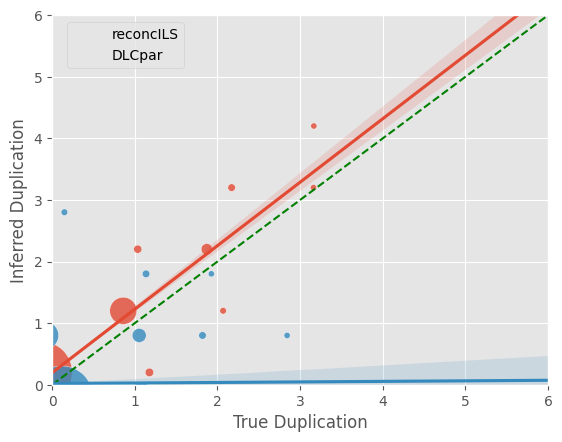

<Figure size 640x480 with 0 Axes>

In [58]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Concatenate and group the data
result1 = pd.concat([True_Duplication['Duplication'], reconcILS_Duplication['Duplication']], ignore_index=True, axis=1)
result11 = result1.groupby([0, 1]).size().reset_index(name='Count')

result12 = pd.concat([True_Duplication['Duplication'], dlc_Duplication['Duplication']], ignore_index=True, axis=1)
result22 = result12.groupby([0, 1]).size().reset_index(name='Count')

# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.2
result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

# Create the line
x = range(11)
y = range(11)
ax = plt.plot(x, y, '--', color='g')

# Plot the scatter plots
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

# Show the regression plots
ax = sns.regplot(x=result1[0], y=result1[1], data=result1, marker="", truncate=False,fit_reg=True,   label='reconcILS')
ax = sns.regplot(x=result12[0], y=result12[1], data=result12, marker="", truncate=False,fit_reg=True, label='DLCpar')


plt.xlabel("True Duplication")
plt.ylabel("Inferred Duplication")

# Set the axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.legend(bbox_to_anchor=(0.28, 1))

# Save the plot to a file
plt.savefig('regex_dups_small.png', dpi=500)

# Show the plot
plt.show()
plt.clf()


In [34]:
result1 =pd.concat([TRUE_Loss['Loss'],reconcILS_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')

x =range(10)
y = range(10)



# Create the line
line = plt.plot(x, y, '--',color='g')


# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="", truncate=False,fit_reg=True, scatter_kws={'alpha':1}, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="",truncate=False,fit_reg=True,scatter_kws={'alpha':1}, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Inferred Loss")
# Show the plot
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_small.png', dpi=500)

plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

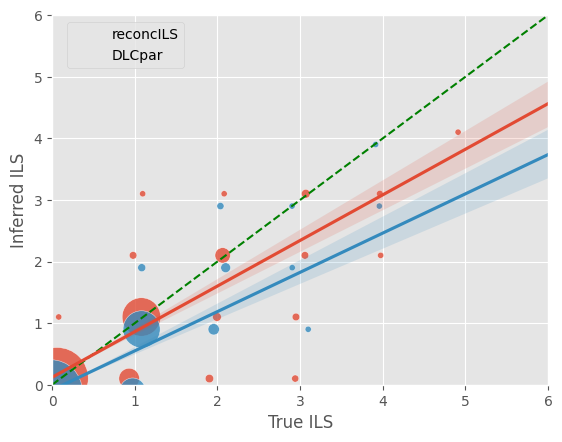

<Figure size 640x480 with 0 Axes>

In [33]:
result1 =pd.concat([TRUE_NNI['NNI'],reconcILS_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = range(70)
y = range(70)

# Create the line
line = plt.plot(x, y, '--',color='g')



# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter


sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="",truncate=False, fit_reg=True, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="",truncate=False,fit_reg=True, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Inferred ILS")
# Show the plot
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_small.png', dpi=500)

plt.show()
plt.clf()

# Compute Correlation

In [61]:
from scipy.stats import spearmanr,pearsonr
#df=pd.read_csv('/N/u/samishr/Quartz/Desktop/ee/reconcILS/reconcILS/example/Results/10_01_1_result.csv')

rho_reconcILS_loss_spearman,p_reconcILS_loss_spearman  = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss']))
rho_reconcILS_dups_spearman, p_reconcILS_dups_spearman = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['dups']))
rho_reconcILS_NNI_spearman, p_reconcILS_NNI_spearman = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI']))

rho_reconcILS_loss_pearson, p_reconcILS_loss_pearson = pearsonr(df[df.Process == "True Process"]['Loss'],df[df.Process == "reconcILS"]['Loss'])
rho_reconcILS_dups_pearson, p_reconcILS_dups_pearson = pearsonr(df[df.Process == "True Process"]['Duplication'],df[df.Process == "reconcILS"]['Duplication'])
rho_reconcILS_NNI_pearson, p_reconcILS_NNI_pearson = pearsonr(df[df.Process == "True Process"]['NNI'],df[df.Process == "reconcILS"]['NNI'])


print('Pearson R reconcILS')
print('reconcILS_Duplication:', rho_reconcILS_dups_pearson)
print('reconcILS_Loss:', rho_reconcILS_loss_pearson)
print('reconcILS_NNI:', rho_reconcILS_NNI_pearson)


print('Spearman R reconcILS')
print('reconcILS_Duplication:',rho_reconcILS_dups_spearman)
print('reconcILS_Loss:',rho_reconcILS_loss_spearman)
print('reconcILS_NNI:',rho_reconcILS_NNI_spearman)



Pearson R reconcILS
reconcILS_Duplication: 0.9633262175024866
reconcILS_Loss: 0.15434381514526818
reconcILS_NNI: 0.3789420164857727
Spearman R reconcILS
reconcILS_Duplication: 0.9265503513560164
reconcILS_Loss: 0.25171828279665864
reconcILS_NNI: 0.4060051347628874


In [30]:
from scipy.stats import spearmanr,pearsonr
#df=pd.read_csv('/N/u/samishr/Quartz/Desktop/ee/reconcILS/reconcILS/example/Results/10_01_1_result.csv')

rho_dlcpar_loss_spearman,p_dlcpar_loss_spearman  = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss']))
rho_dlcpar_dups_spearman, p_dlcpar_dups_spearman = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['dups']))
rho_dlcpar_NNI_spearman, p_dlcpar_NNI_spearman = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

rho_dlcpar_loss_pearson, p_dlcpar_loss_pearson = pearsonr(df[df.Process == "True Process"]['Loss'],df[df.Process == "DLCpar"]['Loss'])
rho_dlcpar_dups_pearson, p_dlcpar_dups_pearson = pearsonr(df[df.Process == "True Process"]['Duplication'],df[df.Process == "DLCpar"]['Duplication'])
rho_dlcpar_NNI_pearson, p_dlcpar_NNI_pearson = pearsonr(df[df.Process == "True Process"]['DLCILS'],df[df.Process == "DLCpar"]['DLCILS'])


print('Pearson R DLCpar')
print('reconcILS_Duplication:', rho_dlcpar_dups_pearson)
print('reconcILS_Loss:', rho_dlcpar_loss_pearson)
print('reconcILS_NNI:', rho_dlcpar_NNI_pearson)


print('Spearman R DLCpar')
print('reconcILS_Duplication:',rho_dlcpar_dups_spearman)
print('reconcILS_Loss:',rho_dlcpar_loss_spearman)
print('reconcILS_NNI:',rho_dlcpar_NNI_spearman)



Pearson R DLCpar
reconcILS_Duplication: 0.9768126251119398
reconcILS_Loss: 0.4155016912142817
reconcILS_NNI: 0.7420928048218528
Spearman R DLCpar
reconcILS_Duplication: 0.975232429224539
reconcILS_Loss: 0.47579569345976214
reconcILS_NNI: 0.7589427759236541
